# Analisis Varians (ANOVA) di Python

## Latar Belakang

Analisis varians (ANOVA) adalah metode statistik untuk menentukan apakah terdapat perbedaan yang signifikan antara rata-rata dari tiga kelompok atau lebih. ANOVA sangat berguna dalam eksperimen yang melibatkan lebih dari dua perlakuan atau kondisi. 

Metode ini memperluas konsep uji-t dua sampel dengan menghindari masalah inflasi *Type I error* jika kita melakukan beberapa uji-t secara terpisah.

---

## Perbedaan antara t-test dan F-test

- **t-test**: digunakan untuk membandingkan **dua rata-rata**.
- **F-test (ANOVA)**: digunakan untuk membandingkan **tiga atau lebih rata-rata**.

Jika kita memiliki tiga kelompok, maka menggunakan uji t-tes secara berulang (pasangan-pasangan) akan meningkatkan peluang kesalahan. ANOVA menyelesaikan masalah ini dengan satu uji komprehensif.

---

## Apa itu p-value dan bagaimana menghitungnya?

ANOVA menghitung dua jenis variabilitas:
- **Variasi antar kelompok**: Seberapa jauh rata-rata tiap kelompok dari rata-rata keseluruhan.
- **Variasi dalam kelompok**: Seberapa jauh data dalam satu kelompok dari rata-rata kelompoknya.

Rasio dari kedua variasi ini disebut **F-statistik**, dan digunakan untuk menghitung p-value berdasarkan distribusi F.

---

## Apa Arti dari p-value?

- **p-value kecil (< 0.05)**: Ada perbedaan signifikan antar kelompok, sehingga kita **tolak H₀** (setidaknya satu rata-rata berbeda).
- **p-value besar (≥ 0.05)**: Tidak ada bukti cukup bahwa rata-rata berbeda, sehingga kita **gagal menolak H₀**.





## Studi Kasus 1: Efektivitas Metode Belajar Online

Seorang dosen ingin mengetahui apakah metode belajar online yang berbeda memengaruhi nilai akhir mahasiswa. Tiga metode digunakan:

- **Video Interaktif**
- **Zoom Meeting**
- **Forum Diskusi**

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import shapiro, levene


# Simulasi data
np.random.seed(10)
video = np.random.normal(80, 5, 30)
zoom = np.random.normal(75, 6, 30)
forum = np.random.normal(78, 4, 30)

# Uji ANOVA
f_stat, p_val = stats.f_oneway(video, zoom, forum)

print(f"F-statistik: {f_stat:.3f}")
print(f"p-value: {p_val:.3f}")

F-statistik: 9.522
p-value: 0.000


In [28]:
# Statistik Deskriptif
df1 = pd.DataFrame({
    'Nilai': np.concatenate([video, zoom, forum]),
    'Metode': ['Video']*30 + ['Zoom']*30 + ['Forum']*30
})

print("=== Statistik Deskriptif ===")
print(df1.groupby('Metode')['Nilai'].describe())

=== Statistik Deskriptif ===
        count       mean       std        min        25%        50%  \
Metode                                                                
Forum    30.0  77.714095  4.492484  69.473152  75.377274  77.593944   
Video    30.0  80.989957  5.272905  70.111359  78.764570  81.235354   
Zoom     30.0  75.699911  4.403927  69.363400  72.843880  74.585467   

              75%        max  
Metode                        
Forum   79.776050  87.870604  
Video   84.750127  91.924837  
Zoom    78.143502  89.368222  


In [29]:
# Uji Asumsi Normalitas
print("\n=== Uji Normalitas (Shapiro-Wilk) ===")
for metode in ['Video', 'Zoom', 'Forum']:
    stat, p = shapiro(df1[df1['Metode'] == metode]['Nilai'])
    print(f"{metode}: p-value = {p:.4f}")


=== Uji Normalitas (Shapiro-Wilk) ===
Video: p-value = 0.7169
Zoom: p-value = 0.0356
Forum: p-value = 0.7514


In [30]:
# Uji Asumsi Homogenitas (Levene)
print("\n=== Uji Homogenitas (Levene) ===")
stat_levene, p_levene = levene(video, zoom, forum)
print(f"Levene stat = {stat_levene:.4f}, p-value = {p_levene:.4f}")



=== Uji Homogenitas (Levene) ===
Levene stat = 0.4375, p-value = 0.6471


In [31]:
# Model ANOVA menggunakan OLS
model = smf.ols('Nilai ~ C(Metode)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== ANOVA (dari statsmodels) ===")
print(anova_table)



=== ANOVA (dari statsmodels) ===
                sum_sq    df         F    PR(>F)
C(Metode)   427.727966   2.0  9.521921  0.000182
Residual   1954.035041  87.0       NaN       NaN


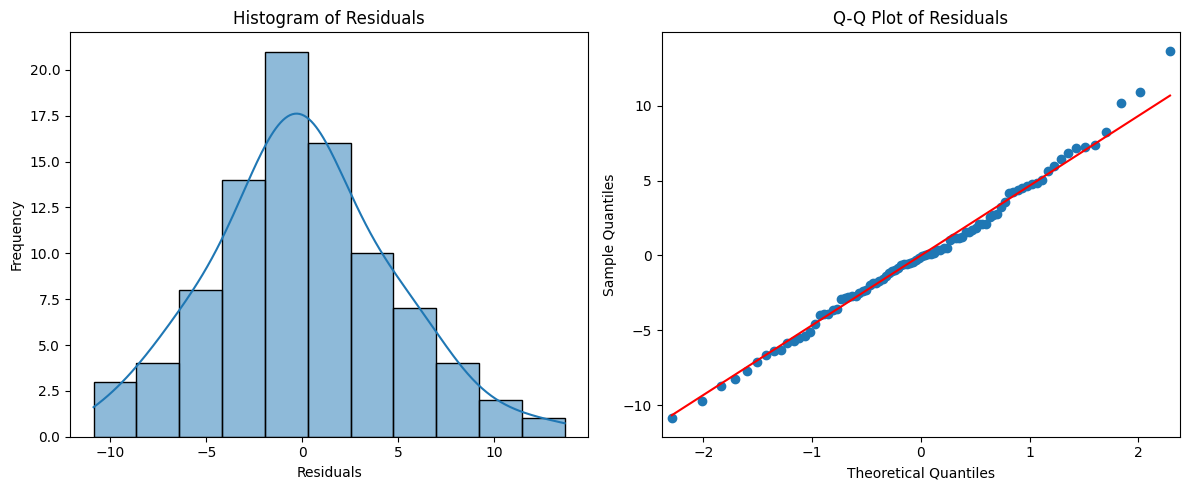

In [32]:
# Analisis Residual
residuals = model.resid
fitted = model.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram Residual
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Frequency")

# Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

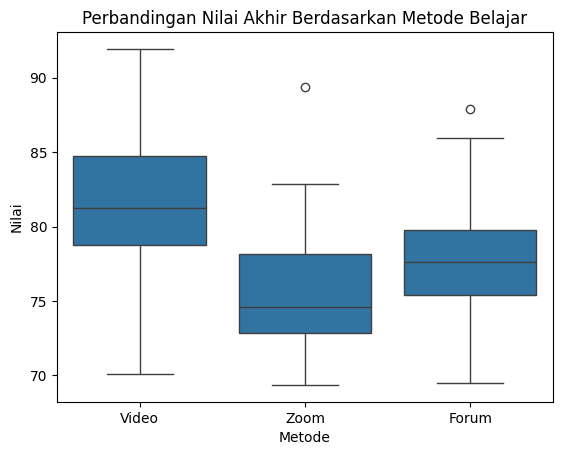

In [33]:
df = pd.DataFrame({
    'Nilai': np.concatenate([video, zoom, forum]),
    'Metode': ['Video']*30 + ['Zoom']*30 + ['Forum']*30
})

sns.boxplot(x='Metode', y='Nilai', data=df)
plt.title('Perbandingan Nilai Akhir Berdasarkan Metode Belajar')
plt.show()


In [34]:

model2 = smf.ols('Nilai ~ C(Metode)', data=df1).fit()

# Ringkasan Model
print("\n=== Ringkasan Model OLS ===")
print(model2.summary())


=== Ringkasan Model OLS ===
                            OLS Regression Results                            
Dep. Variable:                  Nilai   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     9.522
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           0.000182
Time:                        12:58:17   Log-Likelihood:                -266.21
No. Observations:                  90   AIC:                             538.4
Df Residuals:                      87   BIC:                             545.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interce

## Studi Kasus 2: Pengaruh Jenis Pupuk terhadap Hasil Panen

Seorang petani ingin mengetahui apakah jenis pupuk memengaruhi hasil panen tomat. Ada tiga jenis pupuk:
- **Pupuk A**
- **Pupuk B**
- **Pupuk C**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene

In [36]:
# Simulasi data
pupuk_a = np.random.normal(55, 5, 20)
pupuk_b = np.random.normal(60, 4, 20)
pupuk_c = np.random.normal(58, 6, 20)

# Uji ANOVA
f_stat2, p_val2 = stats.f_oneway(pupuk_a, pupuk_b, pupuk_c)

print(f"F-statistik: {f_stat2:.3f}")
print(f"p-value: {p_val2:.3f}")


F-statistik: 8.952
p-value: 0.000


In [37]:
# Gabungkan data ke dalam DataFrame
df2 = pd.DataFrame({
    'Hasil': np.concatenate([pupuk_a, pupuk_b, pupuk_c]),
    'Pupuk': ['A']*20 + ['B']*20 + ['C']*20
})

# Statistik Deskriptif
print("=== Statistik Deskriptif ===")
print(df2.groupby('Pupuk')['Hasil'].describe())


=== Statistik Deskriptif ===
       count       mean       std        min        25%        50%        75%  \
Pupuk                                                                           
A       20.0  54.582700  4.389929  45.227439  52.249785  55.069189  58.540563   
B       20.0  61.246663  4.476294  53.525717  58.212114  60.879719  64.303754   
C       20.0  58.432124  5.974883  49.844137  54.876513  57.190497  61.402349   

             max  
Pupuk             
A      60.538541  
B      69.861300  
C      69.912314  


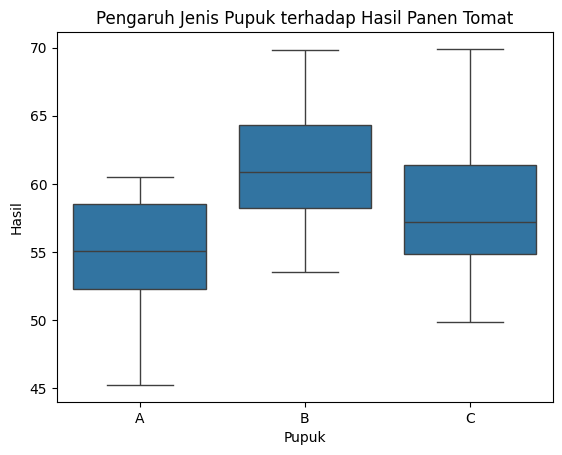

In [38]:
# Visualisasi boxplot
sns.boxplot(x='Pupuk', y='Hasil', data=df2)
plt.title('Pengaruh Jenis Pupuk terhadap Hasil Panen Tomat')
plt.show()

In [39]:
# Uji Normalitas
print("\n=== Uji Normalitas (Shapiro-Wilk) per Jenis Pupuk ===")
for pupuk in df2['Pupuk'].unique():
    nilai = df2[df2['Pupuk'] == pupuk]['Hasil']
    stat, p = shapiro(nilai)
    print(f"Pupuk {pupuk}: p-value = {p:.4f}")


=== Uji Normalitas (Shapiro-Wilk) per Jenis Pupuk ===
Pupuk A: p-value = 0.1656
Pupuk B: p-value = 0.6571
Pupuk C: p-value = 0.2590


In [40]:
# Uji Homogenitas
print("\n=== Uji Homogenitas Varians (Levene) ===")
groups2 = [df2[df2['Pupuk'] == pupuk]['Hasil'] for pupuk in df2['Pupuk'].unique()]
stat, p = levene(*groups2)
print(f"Levene p-value = {p:.4f}")


=== Uji Homogenitas Varians (Levene) ===
Levene p-value = 0.3529


In [41]:
# Uji ANOVA
print("\n=== Model ANOVA (OLS) ===")
model2 = smf.ols('Hasil ~ C(Pupuk)', data=df2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print(anova_table2)


=== Model ANOVA (OLS) ===
               sum_sq    df         F    PR(>F)
C(Pupuk)   447.654048   2.0  8.952136  0.000416
Residual  1425.150387  57.0       NaN       NaN


In [42]:
# Model OLS dan ANOVA
model2 = smf.ols('Hasil ~ C(Pupuk)', data=df2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

# Interpretasi hasil ANOVA
p_val2 = anova_table2['PR(>F)'].iloc[0]
if p_val2 < 0.05:
    print("\n>> Ada perbedaan signifikan antar jenis pupuk.")
else:
    print("\n>> Tidak ada perbedaan signifikan antar jenis pupuk.")


>> Ada perbedaan signifikan antar jenis pupuk.



=== Residual Analysis ===


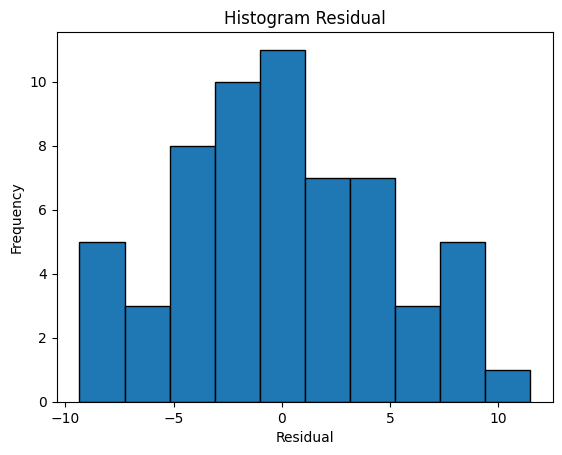

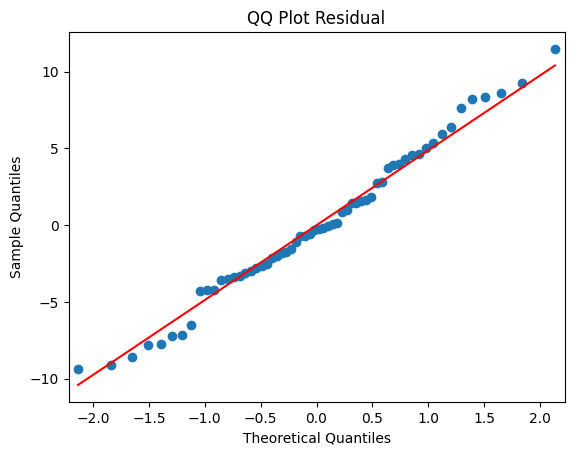

In [43]:
# Analisis Residual
print("\n=== Residual Analysis ===")
resid2 = model2.resid

plt.hist(resid2, bins=10, edgecolor='k')
plt.title("Histogram Residual")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

sm.qqplot(resid2, line='s')
plt.title("QQ Plot Residual")
plt.show()

In [44]:
# Post hoc test jika signifikan
if p_val2 < 0.05:
    print("\n=== Post Hoc Test (Tukey HSD) ===")
    tukey2 = pairwise_tukeyhsd(endog=df2['Hasil'], groups=df2['Pupuk'], alpha=0.05)
    print(tukey2)


=== Post Hoc Test (Tukey HSD) ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B    6.664 0.0003  2.8589 10.469   True
     A      C   3.8494 0.0468  0.0443 7.6545   True
     B      C  -2.8145 0.1854 -6.6196 0.9905  False
---------------------------------------------------


In [45]:
# Ringkasan Model
print("\n=== Ringkasan Model OLS ===")
print(model2.summary())


=== Ringkasan Model OLS ===
                            OLS Regression Results                            
Dep. Variable:                  Hasil   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     8.952
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           0.000416
Time:                        12:58:20   Log-Likelihood:                -180.17
No. Observations:                  60   AIC:                             366.3
Df Residuals:                      57   BIC:                             372.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        

## Interpretasi dan Kesimpulan
Jika p-value < 0.05, berarti terdapat perbedaan signifikan antara rata-rata dari kelompok yang diuji.

Jika p-value ≥ 0.05, maka tidak ada perbedaan yang signifikan.

Studi kasus di atas menunjukkan bagaimana ANOVA dapat digunakan untuk membuat keputusan berbasis data dalam dunia pendidikan maupun pertanian.